# Wikipedia Article Generation Final Project

##### Authors: Sean Lee & Maria Mercado

#### Github: https://github.com/seanglee21/CS-505-Final-Project-Wikipedia



## Abstract

We compare two distinct model architectures, an custom LSTM trained from scratch and a pretrained GPT-2 transformer transferred onto our dataset in the task of one-to-many sequence generation using Wikipedia articles as our source. Overall, the transformer performed much better than the LSTM, being able to capture both stylistic as well as some semantic features of the data, while the LSTM struggled with generating a sequence of word embeddings.

## Introduction & Data Analysis

Our dataset was scraped from Wikipedia and consisted of 10,000 title-article pairings. We chose to use Wikipedia to create our custom dataset because of its adaptability and variety, its consistent styling as well as its structure of a short title and a longer article. Data preprocessing and word embedding was handled differently for both models, the LSTM used a set sequence lengths and GloVe embeddings while the transformer used variable sequene lengths and GPT's tokenizer.

## Approach 1: LSTM

Since our task involves sequential data an LSTM seemed like the natural choice because of its ability to remember information from previous steps due to its hidden state. LSTM's have been shown to be effective in predicting word embeddings to generate sentences auto-regressively, but we wanted to test how effectively the model works in a one-to-many setting, where all of the output would be generated at once rather than a word at a time.

Typically LSTM's have a input sequence that matches the shape of the target sequence. In order to account for this fixed size rule, we decided to use the minimum title length of 1 word and a target sequence of only 10 words to improve computation. We used pretrained GloVe embeddings and adapted them to include the vocabulary and context of our dataset. The embeddings worked well on the tokens, including those in other languages, at least grouping the words by the language they belong to. These embeddings were applied to our dataset and we tried the 50-dimensional as well as 300-dimensional embeddings to see if there would be a difference in performance.

The first version of the LSTM consisted of a single layer of 512 neurons and contained 2 linear layers determine the final sequence of word embeddings. Since the model is trying to recreate the original embeddings, we used mean squared-error as our loss function. The model struggled with over-generalization so we used SGD as our optimizer with a scheduler to set the learning rate.






### Results



The model struggled to converge unless we used a very large batch size. Even then only the validation loss would show improvement with a noisy training loss. The output of the model additionally consisted of just a single word repeated showing signs of over-generalization.

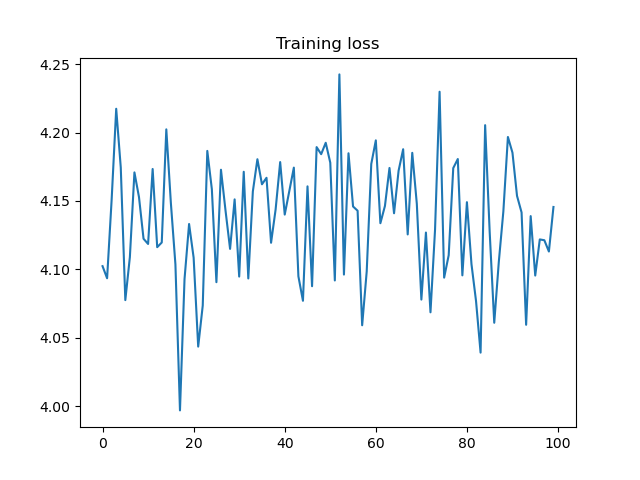

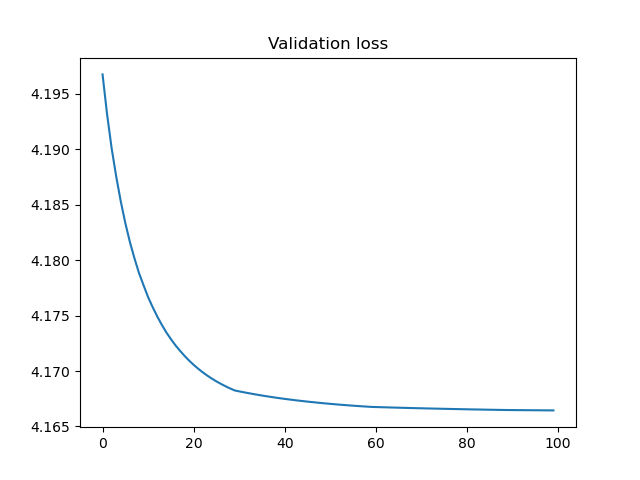

Because of the model's over-generalization and training instability, despite changes in batch size and learning rate, we decided to develop larger model. We added another LSTM layer and used higher dimensional GloVe embeddings. This second model struggled again with over-generalization and failed to generate a sequence of words matching the original text.

## Approach 2: Transformer
A Transformer is a suitable choice for the comparison between generative models that use attention and those that don't as it captures patterns of long-range dependencies and context. It is important to note that transformers are trained much faster than RNNs, which in turn helps mitigate the vanishing gradient problem.

Initially, we intended to train a transformer from scratch, but due to time and technical constraints, this was not possible. Thus, we used GPT-2 and tuned it. Because of RAM issues when attempting to train the transformer with the whole dataset, we reduced the size of the dataset to 1000 samples. There is also a validation set included which is 20% percent the size of the training set. The batch size was reduced to account for RAM, this made the training slower as parallelism is reduced. We also adjusted the gradient accumulation steps to 2 to simulate a larger batch size without increasing the GPU memory requirements.

### Results

The model almost converged but for some reason the loss went up after the 40th step. However, the differences within the trends aren't too drastic and the sentences generated are somewhat reasonable in relation to the title for Wikipedia articles.

![](https://drive.google.com/uc?export=view&id=1JASZdI43oB3G7J2TL6aCkbcYCXxwBuPM)

For most of the generated sentences by the custom transformer, they are not necessarily explaining what the title means but just writing something that could be relatively relevant for the topic of the title. The pre-trained GPT-2 on the other hand, the intention of the sentences was to describe the topic from the title.

In [ ]:
from transformers import pipeline
gpt2 = pipeline('text-generation', model='gpt2', device=0)
trc = pipeline('text-generation', model='trc', device=0)

print(gpt2('Virtual Box'))
print(trc('Virtual Box'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Virtual Box and Windows Server 2012 for Windows Server 2012 R2 (6-10) on x64 Windows Server 2012 (4-7) x64 Windows Server 2012 R2 (6-10) Enterprise Linux for Windows Server 2012 R2 on 4'}]
[{'generated_text': 'Virtual Box is the official virtual box for PlayStation Portable 2, designed by Yoshikazu Takazawa and announced for consoles on September 7, 2013. Its predecessor to the original PlayStation Portable was released on April 27, 2013, and was made available'}]


In [ ]:
print(gpt2('Phoenix Wright: Ace Attorney - Spirit of Justice'))
print(trc('Phoenix Wright: Ace Attorney - Spirit of Justice'))

C:\Users\TaiSh\AppData\Roaming\Python\Python310\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Phoenix Wright: Ace Attorney - Spirit of Justice - Star of Time Battleship Zero (2001)\n\n\nAce Attorney - The Ultimate Fighter (2002)\n\n\nKangaroo Court: The World's Greatest Trial (2003)\n\n\nFate"}]
[{'generated_text': 'Phoenix Wright: Ace Attorney - Spirit of Justice, 1995, as Airtel, $10. ISBN 978-0-7868-5543-5. © Ace Attorney Productions, 1997; Ace Attorney: Spirit of Justice, 1998; Ace'}]


In [ ]:
print(gpt2('Ammonium sulfate precipitation'))
print(trc('Ammonium sulfate precipitation'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Ammonium sulfate precipitation or mineral precipitation (m-SO 4 -fluoride), m-OH 4 (r-OH 4 ), and m-CH 3 :H 3 O 4 are the primary drivers of the precipitation. We found that'}]
[{'generated_text': 'Ammonium sulfate precipitation in the North (NPS). Credit: NASA/JPL-Caltech, NASA, and the European Space Agency. The climate model in this study is adapted from a work published in 2007. The first draft of'}]


In [ ]:
print(gpt2('Heartbeat (British TV series)'))
print(trc('Heartbeat (British TV series)'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Heartbeat (British TV series)\n\nIn this comedy - about a young boy who seeks help from his mentor, who has been kidnapped and rescued by the mysterious M.P.E.S. (Mutant Mobs) - the boys'}]
[{'generated_text': 'Heartbeat (British TV series) In the Season 3 episode "No Way Out" ("A Very Long Time"), Amy gets a call about a very long time ago - only to hear she isn\'t going to get the job. She calls back to'}]


## Conclusion

While neither approach exactly replicated the orininal article's content or exact style, the performance of the transformer model was clearly better for this task of one-to-many generation. The transformer model showed both clear improvement over the LSTM as well as the pretrained GPT for this task and did manage to capture the overall style of the articles. The transformer model also offers greater flexibility in the size of the inputs and outputs, allowing for more information to be passed into the model.

Continued work could be put into the data collection and processing to allow both models more information to train from. It would also be interesting to see how more modern transformer models would perform compared to the trained GPT-2 model. If we were to use an LSTM for this kind of one-to-many generation task, we should prefer to use one-hot encodings rather than large dimensional word embeddings, since the regression task for such a deep sequence proved to be too difficult.